# ***Analyse et Visualisation des Données Financières d'un Chantier***

Ce notebook documente le processus de nettoyage, d'analyse et de visualisation des données financières associées à un chantier spécifique. L'objectif est de transformer les données brutes en insights exploitables, en identifiant les tendances des coûts, en évaluant les dépenses par type de prestation

In [ ]:
import pandas as pd

In [ ]:
# Lire le fichier Excel importé
data = pd.read_excel('DEPENSES COMMUN CHANTIER BEN IDDER.xlsx', sheet_name='DEPENSES SOBAFREP TAB 1  ', skiprows=4)

In [ ]:
# Afficher les premières lignes du dataset pour vérification
data.head()

,DATE,PRESTATIONS,MT,MODE DE REGLEMENT,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,Gasoil berlingo pour preparation ouverture c...,270,ESP,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,auto route ( 13+49 ),62,ESP,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,achat Triifold reunion chantier,17,ESP,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Frais repas,205,ESP,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-08-13 00:00:00,Tirage plans architecturale ( 3 copies ),24,ESP,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Étape 1 : Nettoyage des Données



Nous allons supprimer les colonnes "Unnamed" qui ne contiennent pas d'informations utiles. Nous allons ensuite examiner les valeurs manquantes et décider comment les gérer.   On va S'assurer que les dates sont bien au format datetime et que les montants sont bien au format numérique.

*   Supprimer les colonnes inutiles et gérer les valeurs manquantes :

In [ ]:
# Supprimer les colonnes "Unnamed"
data_cleaned = data.drop(columns=[col for col in data.columns if "Unnamed" in col])

# Supprimer les lignes où toutes les colonnes sont NaN
data_cleaned = data_cleaned.dropna(how='all')

# Convertir les dates
data_cleaned['DATE'] = pd.to_datetime(data_cleaned['DATE'], errors='coerce')

# Supprimer les lignes avec des dates NaN (lignes sans date)
data_cleaned = data_cleaned.dropna(subset=['DATE'])

# Afficher les premières lignes après nettoyage
data_cleaned.head()

,DATE,PRESTATIONS,MT,MODE DE REGLEMENT
4,2020-08-13,Tirage plans architecturale ( 3 copies ),24,ESP
5,2020-09-03,Gagoil pour ouverture chantier 2 fois,520,ESP
9,2020-09-22,Gasoil berlingo,350,ESP
11,2020-09-30,Gasoil berlingo,340,ESP
13,2020-10-06,ACHAT 28 SACS DE CPJ 45 ET 4 mangan pour pioches,2200,CHQ N° AAY 6208916


*   Vérification des types de données :

In [ ]:
# Afficher les types de données
data_cleaned.dtypes

,0
DATE,datetime64[ns]
PRESTATIONS,object
MT,object
MODE DE REGLEMENT,object


In [ ]:
# Convertir directement la colonne 'MT ' en type float
data_cleaned['MT '] = pd.to_numeric(data_cleaned['MT '], errors='coerce')

# Vérifier les types de données après conversion
data_cleaned.dtypes


,0
DATE,datetime64[ns]
PRESTATIONS,object
MT,float64
MODE DE REGLEMENT,object


# Étape 2 : Analyse des statistiques descriptives

In [ ]:
# Statistiques descriptives pour la colonne 'MT'
data_cleaned['MT '].describe()

,MT
count,13.000000
mean,3576.057692
std,11244.708971
min,24.000000
25%,230.000000
50%,340.000000
75%,457.000000
max,40957.750000


In [ ]:
# Vérifier s'il y a des valeurs manquantes dans 'MT'
data_cleaned['MT '].isnull().sum()

0

In [ ]:
# Répartition des coûts par type de prestation
costs_by_prestation = data_cleaned.groupby('PRESTATIONS ')['MT '].sum()
print(costs_by_prestation)

PRESTATIONS 
ACHAT 28 SACS DE CPJ 45 ET 4 mangan pour pioches                        2200.00
Achat premiére commande d'acier à béton , fils d'attache et points     40957.75
Gagoil  pour ouverture chantier  2 fois                                  520.00
Gasoil berlingo                                                         2330.00
Gasoil pour bétonniére et compacteur                                     457.00
Tirage plans  architecturale ( 3 copies )                                 24.00
Name: MT , dtype: float64


In [ ]:
# Répartition des coûts au fil du temps
costs_by_date = data_cleaned.groupby('DATE')['MT '].sum()
print(costs_by_date)

DATE
2020-08-13       24.00
2020-09-03      520.00
2020-09-22      350.00
2020-09-30      340.00
2020-10-06     2200.00
2020-10-15      230.00
2020-11-13      330.00
2020-11-17    40957.75
2020-11-21      200.00
2020-11-25      457.00
2020-11-28      200.00
2020-12-05      340.00
2020-12-29      340.00
Name: MT , dtype: float64


Text(0.5, 1.0, 'Coûts par type de préstation')

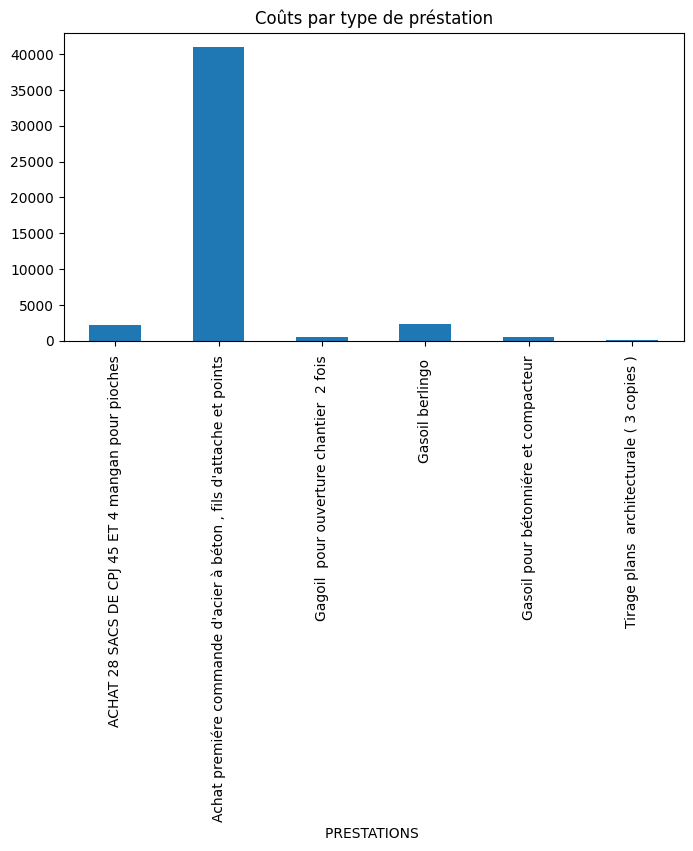

In [ ]:
import matplotlib.pyplot as plt

# Graphique à barres des coûts par type de prestation
plt.figure(figsize=(8, 4))
costs_by_prestation.plot(kind='bar')
plt.title('Coûts par type de préstation')

# ***`Graphique 1 : Coûts par type de prestation `***
Achat de la première commande d'acier à béton, fils d'attache et points : Cette prestation représente la majorité des coûts, ce qui indique qu'il s'agit d'une dépense significative pour ce chantier. Les autres prestations, comme l'achat de matériaux pour les pioches, le gasoil, et les frais divers, sont beaucoup moins coûteuses en comparaison.

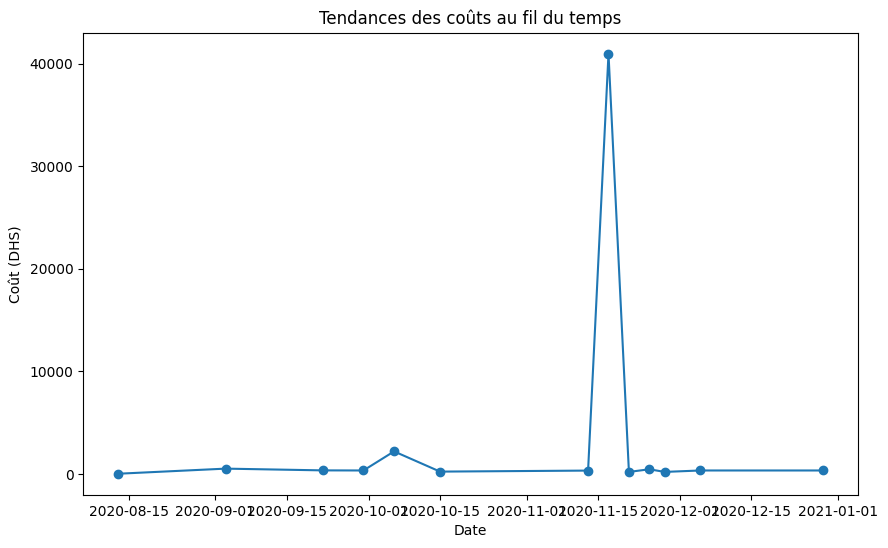

In [ ]:
# Tendances des coûts au fil du temps
plt.figure(figsize=(10, 6))
plt.plot(costs_by_date.index, costs_by_date.values, marker='o')
plt.title('Tendances des coûts au fil du temps')
plt.xlabel('Date')
plt.ylabel('Coût (DHS)')
plt.show()

# ***`Graphique 2 : Tendances des coûts au fil du temps`***
Il y a un pic très marqué en novembre 2020, correspondant probablement à l'achat majeur de l'acier à béton. En dehors de ce pic, les coûts restent relativement faibles et stables tout au long du projet. Ce que ces graphiques nous disent :
Concentration des coûts : Une seule prestation représente une part disproportionnée du budget, ce qui pourrait être un point à surveiller pour la gestion des futurs projets.
Gestion du budget dans le temps : Les dépenses sont majoritairement concentrées sur une période spécifique, ce qui peut indiquer une phase clé du projet (comme l'achat de matériaux critiques).

In [ ]:
# Calculer des statistiques descriptives avancées
stats = data_cleaned['MT '].describe()
print(stats)

# Calculer l'écart-type
std_dev = data_cleaned['MT '].std()
print(f"Ecart-type : {std_dev}")

# Calculer les quartiles
quartiles = data_cleaned['MT '].quantile([0.25, 0.5, 0.75])
print("Quartiles :")
print(quartiles)


count       13.000000
mean      3576.057692
std      11244.708971
min         24.000000
25%        230.000000
50%        340.000000
75%        457.000000
max      40957.750000
Name: MT , dtype: float64
Ecart-type : 11244.708970664198
Quartiles :
0.25    230.0
0.50    340.0
0.75    457.0
Name: MT , dtype: float64


In [ ]:
# Identifier les prestations avec les coûts les plus élevés
high_cost_prestations = costs_by_prestation[costs_by_prestation > costs_by_prestation.mean()]
print("Prestations avec des coûts supérieurs à la moyenne :")
print(high_cost_prestations)

Prestations avec des coûts supérieurs à la moyenne :
PRESTATIONS 
Achat premiére commande d'acier à béton , fils d'attache et points     40957.75
Name: MT , dtype: float64


In [ ]:
# Analyser les dates avec les plus grands pics de coûts
peak_dates = data_cleaned.groupby('DATE')['MT '].sum().sort_values(ascending=False)
print("Dates avec les plus grands pics de coûts :")
print(peak_dates.head())

Dates avec les plus grands pics de coûts :
DATE
2020-11-17    40957.75
2020-10-06     2200.00
2020-09-03      520.00
2020-11-25      457.00
2020-09-22      350.00
Name: MT , dtype: float64


# Étape 3 : export des données nettoyées vers un fichier CSV

In [ ]:
# Exporter les données nettoyées en CSV
data_cleaned.to_csv('data_cleaned.csv', index=False)
